**Import necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import ADASYN

**Import Kaggle Dataset**

In [2]:
df = pd.read_csv("../input/cervical-cancer-risk-classification/kag_risk_factors_cervical_cancer.csv")
df.head(20) #print first 10 entries of the dataset

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,...,?,?,0,0,0,0,0,0,0,0


**Inspect the dataset**

In [3]:
print(df.shape)
print(df.dtypes)
print(df.describe())
print(df.isnull().sum())

(858, 36)
Age                                    int64
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                                object
Smokes (years)                        object
Smokes (packs/year)                   object
Hormonal Contraceptives               object
Hormonal Contraceptives (years)       object
IUD                                   object
IUD (years)                           object
STDs                                  object
STDs (number)                         object
STDs:condylomatosis                   object
STDs:cervical condylomatosis          object
STDs:vaginal condylomatosis           object
STDs:vulvo-perineal condylomatosis    object
STDs:syphilis                         object
STDs:pelvic inflammatory disease      object
STDs:genital herpes                   object
STDs:molluscum contagiosum            object
STDs:AIDS                             object


**Changing column names so they are easier to use**

In [4]:
df.columns=['Age', 'No_of_sex_partner', 'First_sexual_intercourse',\
                          'No_pregnancies','Smokes',  'Smokes_yrs',  'Smokes_packs_yr',  'Hormonal_Contraceptives',\
                          'Hormonal_Contraceptives_years','IUD', 'IUD_years', 'STDs', 'STDs_number', 'STDs_condylomatosis',\
                          'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis', 'STDs_vulvo_perineal_condylomatosis',\
                          'STDs_syphilis', 'STDs_pelvic_inflammatory_disease', 'STDs_genital_herpes', 'STDs_molluscum_contagiosum',\
                          'STDs_AIDS', 'STDs_HIV', 'STDs_Hepatitis_B', 'STDs_HPV', 'STDs_No_of_diagnosis', 'STD_Time_since_first_diagnosis',\
                          'STDs_Time_since_last_diagnosis', 'Dx_Cancer', 'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann','Schiller' ,'Citology', 'Biopsy']
df.columns

Index(['Age', 'No_of_sex_partner', 'First_sexual_intercourse',
       'No_pregnancies', 'Smokes', 'Smokes_yrs', 'Smokes_packs_yr',
       'Hormonal_Contraceptives', 'Hormonal_Contraceptives_years', 'IUD',
       'IUD_years', 'STDs', 'STDs_number', 'STDs_condylomatosis',
       'STDs_cervical_condylomatosis', 'STDs_vaginal_condylomatosis',
       'STDs_vulvo_perineal_condylomatosis', 'STDs_syphilis',
       'STDs_pelvic_inflammatory_disease', 'STDs_genital_herpes',
       'STDs_molluscum_contagiosum', 'STDs_AIDS', 'STDs_HIV',
       'STDs_Hepatitis_B', 'STDs_HPV', 'STDs_No_of_diagnosis',
       'STD_Time_since_first_diagnosis', 'STDs_Time_since_last_diagnosis',
       'Dx_Cancer', 'Dx_CIN', 'Dx_HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

In [5]:
df = df.replace('?', np.NaN) #replacing missing values with Numpy NaN

**Identifying the percentage of missing values in each risk factor**

<AxesSubplot:>

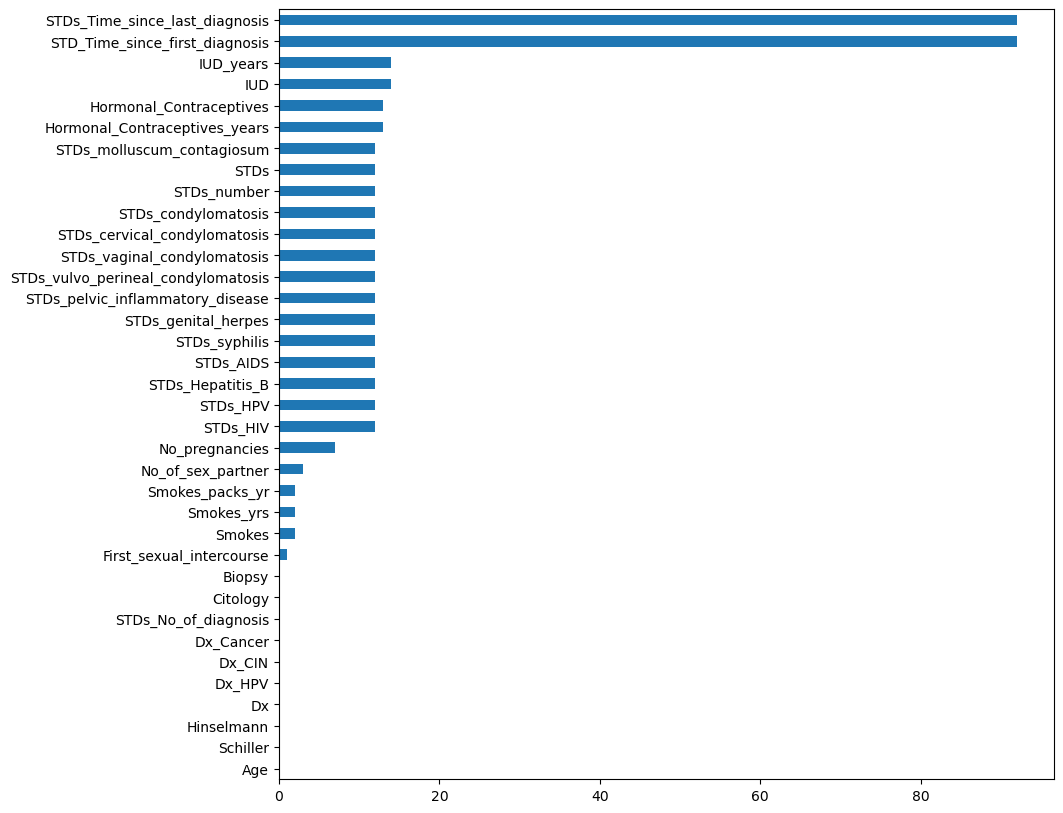

In [6]:
plt.figure(figsize=(10,10))
np.round(df.isnull().sum()/df.shape[0]*100).sort_values().plot(kind='barh')

**Now, columns STDs: Time since last diagnosis and STDs: Time since first diagnoses have a lot of missing values so we drop them as they won't be helpful in training the model.**

In [7]:
df=df.drop(['STD_Time_since_first_diagnosis','STDs_Time_since_last_diagnosis'],axis=1)
df=df.drop(df.index[df.Smokes.isnull()] | df.index[df.First_sexual_intercourse.isnull()])
df.head(50)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead
  


,Age,No_of_sex_partner,First_sexual_intercourse,No_pregnancies,Smokes,Smokes_yrs,Smokes_packs_yr,Hormonal_Contraceptives,Hormonal_Contraceptives_years,IUD,...,STDs_HPV,STDs_No_of_diagnosis,Dx_Cancer,Dx_CIN,Dx_HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,0.0,0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,...,0.0,0,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,...,0.0,0,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,1,0,1,1,0,0,0,0
9,44,3.0,15.0,NaN,1.0,1.266972909,2.8,0.0,0.0,NaN,...,0.0,0,0,0,0,0,0,0,0,0
10,44,3.0,26.0,4.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0


**Identifying and removing the outliers using IQR method**

**Normalising the data using StandardScaler**